In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [3]:

# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Red%20Wine/winequality-red.csv"
df = pd.read_csv(url)


In [4]:

# Define the target variable based on cutoff
df['quality_label'] = (df['quality'] >= 7).astype(int)



In [5]:
# Split data into features and target variable
X = df.drop(columns=['quality', 'quality_label'])
y = df['quality_label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = SVC(random_state=42)
model.fit(X_train, y_train)



SVC(random_state=42)

In [6]:
# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)



Accuracy: 0.85625
Precision: 1.0
Recall: 0.02127659574468085
F1-score: 0.04166666666666667
ROC AUC Score: 0.5106382978723404


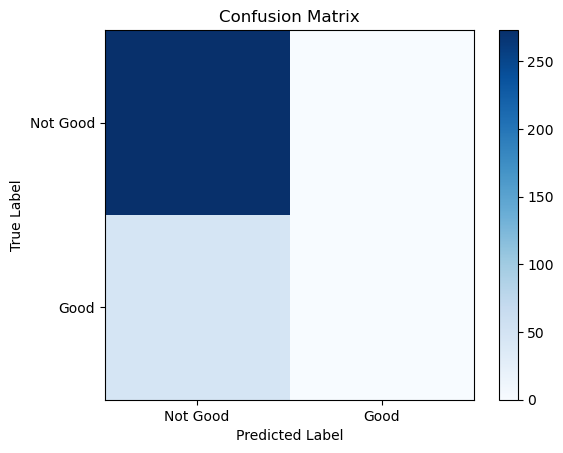

In [7]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Not Good', 'Good'])
plt.yticks([0, 1], ['Not Good', 'Good'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [8]:
# Make prediction for new data
new_data = pd.DataFrame({
    'fixed acidity': [7.2],
    'volatile acidity': [0.23],
    'citric acid': [0.32],
    'residual sugar': [8.5],
    'chlorides': [0.058],
    'free sulfur dioxide': [47],
    'total sulfur dioxide': [197],
    'density': [0.996],
    'pH': [3.09],
    'sulphates': [0.53],
    'alcohol': [9.9]
})

new_prediction = model.predict(new_data)
print("Prediction for new data:", new_prediction[0])


Prediction for new data: 0
